In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)
matplotlib.rcParams['image.cmap'] = 'gray'

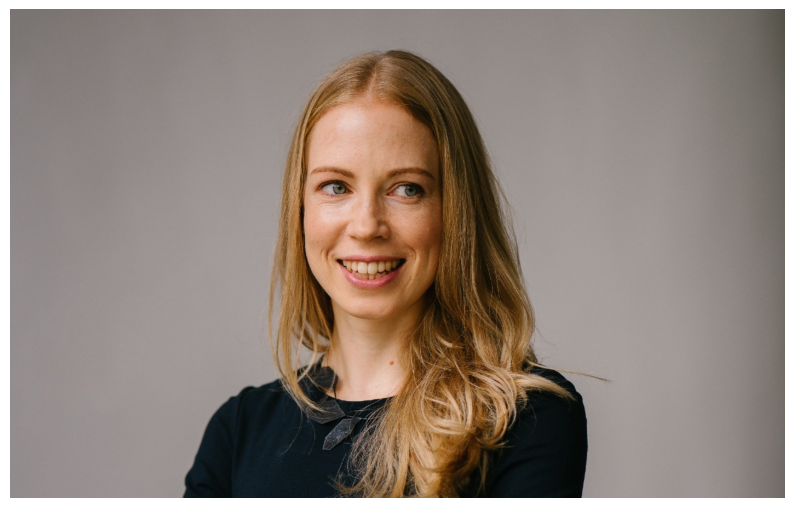

In [2]:
image_filename = 'face.jpg'
img = cv2.imread(image_filename)
plt.imshow(img[:,:,::-1]); plt.axis('off');

In [5]:
MODEL_PATH = './model/res10_300x300_ssd_iter_140000.caffemodel'
CONFIG_PATH = './model/deploy.prototxt'

# Load the face detection model.
net = cv2.dnn.readNetFromCaffe(CONFIG_PATH, MODEL_PATH)

In [6]:
def detect_faces(image, detection_threshold=0.70):

    # Convert to blob.
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), [104, 117, 123])
    
    # Pass the blob to the DNN model.
    net.setInput(blob)
    
    # Retrieve detections from the DNN model.
    detections = net.forward()
    
    # Create a list to store face bounding boxes.
    faces = []

    img_h = image.shape[0]
    img_w = image.shape[1]
    
    # Process the detections.
    for detection in detections[0][0]:
        if detection[2] >= detection_threshold:
            left   = detection[3] * img_w
            top    = detection[4] * img_h
            right  = detection[5] * img_w
            bottom = detection[6] * img_h

            face_w = right - left
            face_h = bottom - top

            face_roi = (left, top, face_w, face_h)
            faces.append(face_roi)
            
    return np.array(faces).astype(int)

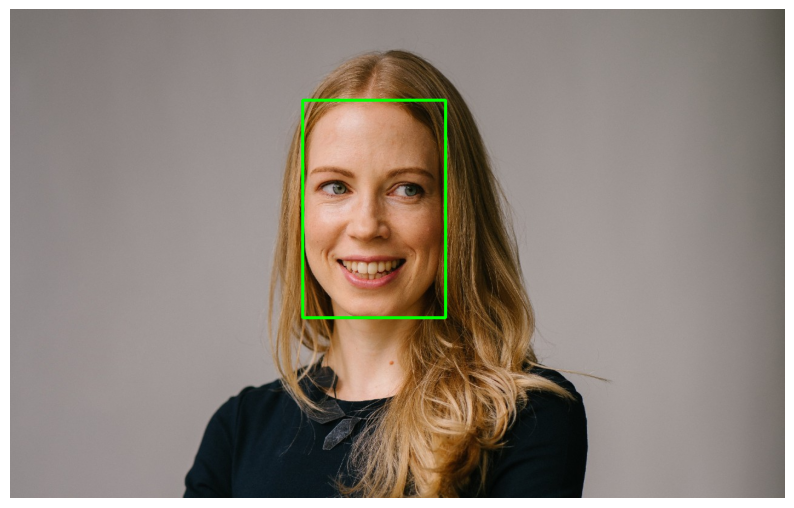

In [7]:
faces = detect_faces(img)

img_display = img.copy()

for face in faces:
    cv2.rectangle(img_display, face, (0,255,0), 3)

plt.imshow(img_display[...,::-1]); plt.axis('off');

In [9]:
# Create the landmark detector instance.
landmarkDetector = cv2.face.createFacemarkLBF()

# Load the model.
model = './model/lbfmodel.yaml'
landmarkDetector.loadModel(model)

In [10]:
retval, landmarksList = landmarkDetector.fit(img, faces)

68


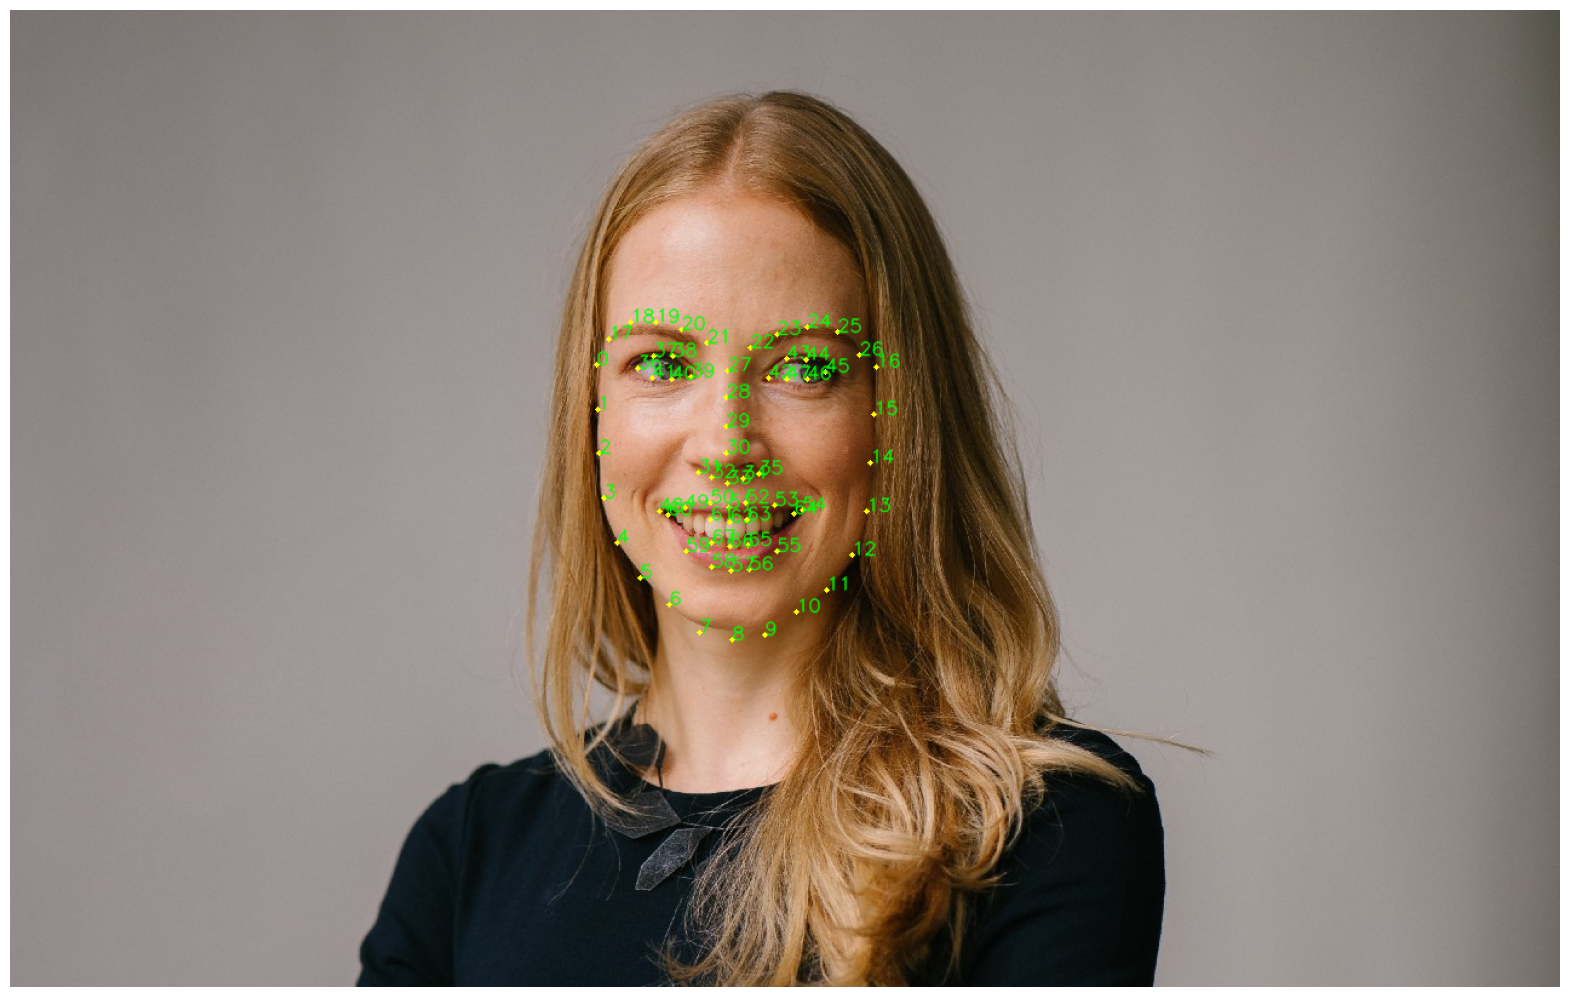

In [11]:
img_display = img.copy()
landmarks = landmarksList[0][0].astype(int)
print(len(landmarks))
for idx in range(len(landmarks)):
    cv2.circle(img_display, landmarks[idx], 2, (0,255,255), -1)
    cv2.putText(img_display, "{}".format(idx), landmarks[idx], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, 
                cv2.LINE_AA)
plt.figure(figsize=(20,20))
plt.imshow(img_display[:,:,::-1]); plt.axis('off');

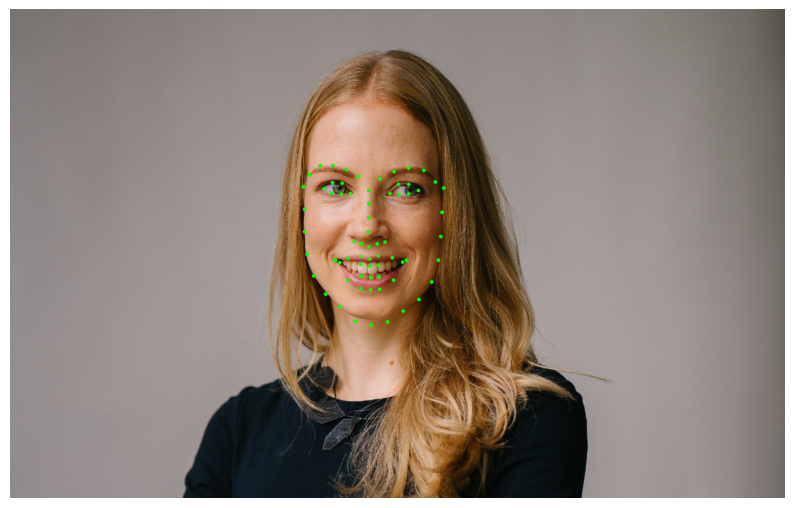

In [12]:
img_display = img.copy()
for landmarks in landmarksList:
    cv2.face.drawFacemarks(img_display, landmarks, (0, 255, 0))

plt.imshow(img_display[...,::-1]); plt.axis('off');